# Usa matplotlib para generar figuras y animaciones

Se mantiene como referencia, pero no se actualiza.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.widgets import Slider, Button

import matplotlib.animation
from IPython.display import HTML


In [ ]:
# Google
# from google.colab import output
# output.enable_custom_widget_manager()

# !pip install ipympl

In [2]:
%matplotlib widget
# %matplotlib ipympl

## Ejercicio 2.2

(-0.8500000000000001, 17.85, -0.6099995855266888, 1.8099999802631757)

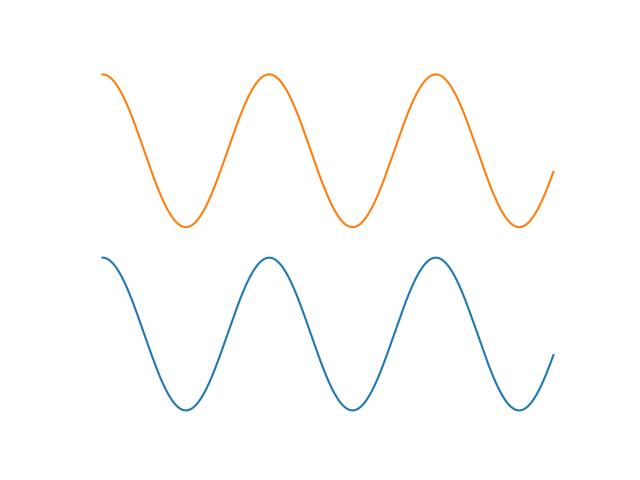

In [4]:
# Dos ondas en fase.
x = np.linspace(0, 17, 1000)
y = [0.5*math.cos(xi) for xi in x] 
y2 = [0.5*math.cos(xi)+1.2 for xi in x] 
plt.plot(x, y)
plt.plot(x, y2)
plt.axis('off')
# plt.savefig("optica-2-2a.png", bbox_inches='tight')


In [5]:
plt.close('all')

(-0.8500000000000001, 17.85, -0.61, 1.81)

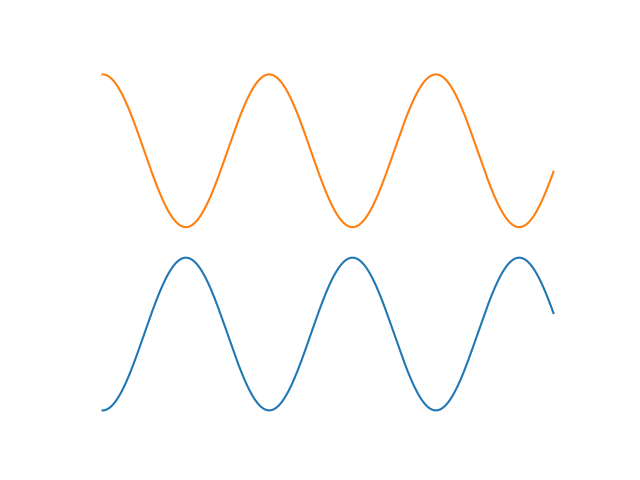

In [6]:
# Dos ondas en contrafase.
x = np.linspace(0, 17, 1000)
y = [0.5*math.cos(xi+math.pi) for xi in x] 
y2 = [0.5*math.cos(xi)+1.2 for xi in x] 
plt.plot(x, y)
plt.plot(x, y2)
plt.axis('off')
# plt.savefig("optica-2-2b.png", bbox_inches='tight')

## Ejercicio 2.3

In [7]:
# Haz 1
def y1(z):
    y = 0.5*np.cos(2*np.pi*z) + 1.2
    return y

# Haz 2
def y2(z, L):
    if z <= 0:
        y = 0.5*np.cos(2*np.pi*z)
    if z > 0 and z <= L:
        y = 0.5*np.cos(2*np.pi*1.58*z)
    if z > L:
        y = 0.5*np.cos(2*np.pi*(z-L) + 2*np.pi*1.58*L)
    return y


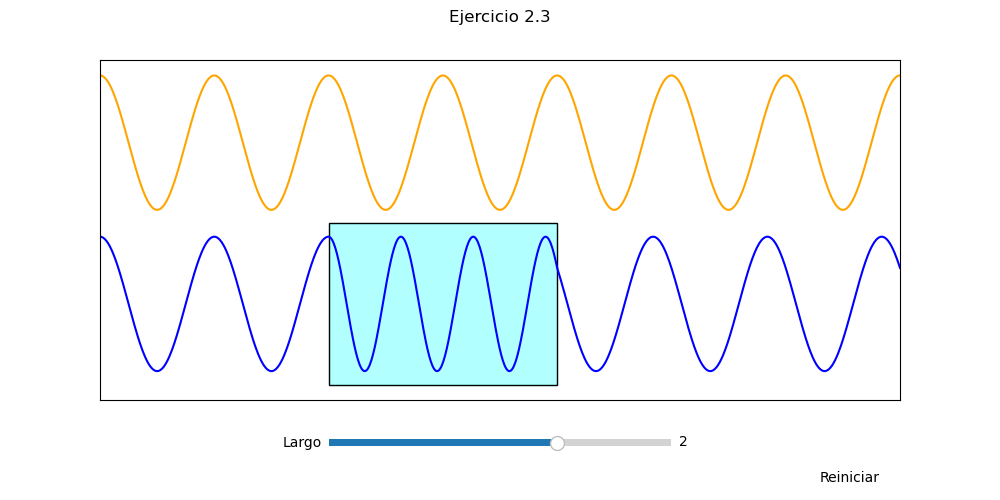

In [8]:
L = 2
L_inicial = 2

z = np.linspace(-2, 5, 1000)
ya = [y1(zi) for zi in z] 
yb = [y2(zi,L) for zi in z] 

fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot(z, yb, color='blue')
ax.plot(z, ya, color='orange')
ax.margins(x=0)
#hide x-axis
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

R1 = Rectangle((0, -0.6), L, 1.2, alpha=0.3, color='cyan')
R2 = Rectangle((0, -0.6), L, 1.2, fill=False, ec='black')
ax.add_patch(R1)
ax.add_patch(R2)
fig.suptitle("Ejercicio 2.3")


# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.1, bottom=0.2)

# Plot axis starts at position 0.1 and has margin x=0 (no padding)
# It ends at position 0.9, that means the x range spans over 80%
# of the figure (horizontally).
# In this case the range is 7 (from x=-2 to x=5).
# To make the slider starts at x=0, we add the percentage of the figure
# corresponding to delta x = 2  (from -2 to 0), that is 80%/7 = p/2
# and we get 160%/7 or 1.6/7, that we add to 0.1 (the offset)
axL = plt.axes([0.1+1.6/7, 0.1, 2.4/7, 0.03])
axL.margins(x=0)

# Make a horizontal slider to control length L
L_slider = Slider(
    ax=axL,
    label='Largo',
    valmin=0,
    valmax=3,
    valinit=L_inicial,
)


# The function to be called anytime a slider's value changes
def update(val):
    yb = [y2(zi,val) for zi in z] 

    line.set_ydata(yb)
    ax.patches[1].remove()
    ax.patches[0].remove()
    R1 = Rectangle((0, -0.6), val, 1.2, alpha=0.3, color='cyan')
    ax.add_patch(R1)
    R2 = Rectangle((0, -0.6), val, 1.2, fill=False, ec='black')
    ax.add_patch(R2)
    fig.canvas.draw_idle()

# register the update function with each slider
L_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reiniciar', hovercolor='0.975')

def reset(event):
    L_slider.reset()
button.on_clicked(reset)


# print(ax.get_position())
# print(ax.margins())
# print(axL.get_position())

plt.axis('off')
plt.show()
# plt.savefig("optica-2-4.png", bbox_inches='tight')


In [9]:
plt.close('all')

## Ejercicio 2.4

In [10]:
# Haz 1
def y1(x):
    if x <= 3.0:
        y = 0.5*np.cos(2*np.pi*x)
    if x > 3.0 and x <= 7.0:
        phi = 2*np.pi*3
        y = 0.5*np.cos(2*np.pi*1.58*(x-3) + phi)
    if x > 7.0:
        phi = 2*np.pi*1.58*(7-3) + 2*np.pi*3
        y = 0.5*np.cos(2*np.pi*(x-7) + phi)
    return y

# Haz 2
def y2(x):
    if x <= 3.0:
        y = 0.5*np.cos(2*np.pi*x) + 1.2
    if x > 3.0 and x <= 6.5:
        phi = 2*np.pi*3
        y = 0.5*np.cos(2*np.pi*1.49*(x-3) + phi) + 1.2
    if x > 6.5:
        phi = 2*np.pi*1.49*(6.5-3) + 2*np.pi*3
        y = 0.5*np.cos(2*np.pi*(x-6.5) + phi) + 1.2
    return y


(-0.5, 10.5, -0.72, 1.92)

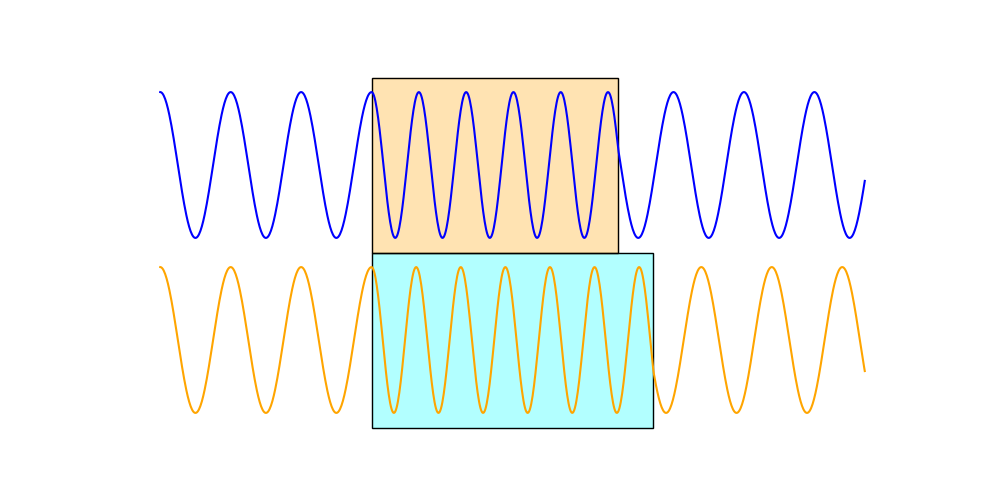

In [11]:
x = np.linspace(0, 10, 1000)
ya = [y1(xi) for xi in x] 
yb = [y2(xi) for xi in x] 

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, ya, color='orange')
ax.plot(x, yb, color='blue')
ax.add_patch(Rectangle((3, -0.6), 4, 1.2, alpha=0.3, color='cyan'))
ax.add_patch(Rectangle((3, -0.6), 4, 1.2, fill=False, ec='black'))
ax.add_patch(Rectangle((3, 0.6), 3.5, 1.2, alpha=0.3, color='orange'))
ax.add_patch(Rectangle((3, 0.6), 3.5, 1.2, fill=False, ec='black'))
plt.axis('off')
# plt.savefig("optica-2-4.png", bbox_inches='tight')

In [10]:
x = np.linspace(0, 10, 1000)
t = np.linspace(0, 1, 200)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([0,10,-0.7,1.8])
l, = ax.plot([],[])
l2, = ax.plot([],[])

def animate(i):
    y1 = np.piecewise(x, [x <= 3.0, ((x > 3.0) & (x <= 7.0)), x > 7.0], 
                      [lambda x: 0.5*np.cos(2*np.pi*x - 2*np.pi*t[i]),
                       lambda x: 0.5*np.cos(2*np.pi*1.58*(x-3) - 2*np.pi*t[i] + 2*np.pi*3),
                       lambda x: 0.5*np.cos(2*np.pi*(x - 7) - 2*np.pi*t[i] + 2*np.pi*1.58*(7-3) + 2*np.pi*3)
                      ])
    y2 = np.piecewise(x, [x <= 3.0, ((x > 3.0) & (x <= 6.5)), x > 6.5], 
                      [lambda x: 0.5*np.cos(2*np.pi*x - 2*np.pi*t[i]) + 1.2,
                       lambda x: 0.5*np.cos(2*np.pi*1.49*(x-3.0) - 2*np.pi*t[i] + 2*np.pi*3) + 1.2,
                       lambda x: 0.5*np.cos(2*np.pi*(x - 6.5) - 2*np.pi*t[i] + 2*np.pi*1.49*(6.5-3) + 2*np.pi*3) + 1.2
                      ])    
    
    l.set_data(x, y1)
    l2.set_data(x, y2)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=20)
plt.axis('off')
ax.add_patch(Rectangle((3, -0.6), 4, 1.2, alpha=0.3, color='cyan'))
ax.add_patch(Rectangle((3, -0.6), 4, 1.2, fill=False, ec='black'))
ax.add_patch(Rectangle((3, 0.6), 3.5, 1.2, alpha=0.3, color='orange'))
ax.add_patch(Rectangle((3, 0.6), 3.5, 1.2, fill=False, ec='black'))


plt.close()

from IPython.display import HTML
# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())
